In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV

# Question 1, 2 et 3

In [2]:
def simu(n, alpha, beta, display=False):
    
    if (alpha>1) | (alpha<0) | (beta>1) | (beta<0):
        raise ValueError('Les paramètres alpha et beta doivent être compris entre 0 et 1.')
    
    X = np.random.uniform(0, 1, (n,2))
    Y = np.zeros((n,))
    mask_inf = np.absolute(X[:,0] + 2*X[:,1]) <= 1
    Y[mask_inf] = np.random.binomial(1, alpha, len(Y[mask_inf]))
    Y[~mask_inf] = np.random.binomial(1, beta, len(Y[~mask_inf]))
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.5)
    
    if display == True:
        sns.relplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, alpha=.5).set(
            title=f"Simulation pour n={X.shape[0]}", xlabel="X1", ylabel="X2")
    
    return  X_train, X_test, y_train, y_test

/users/2024/ds2/122003362/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


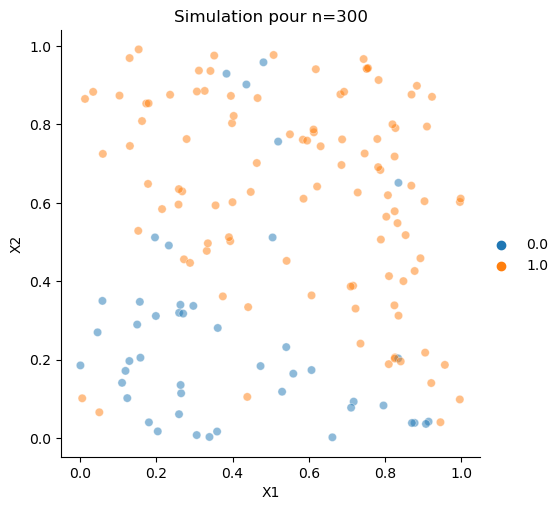

In [3]:
X_train, X_test, y_train, y_test=simu(300, .1, .9,display=True)

In [4]:
df2 = pd.DataFrame(X_train)
df2.columns=['a', 'B']

/users/2024/ds2/122003362/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


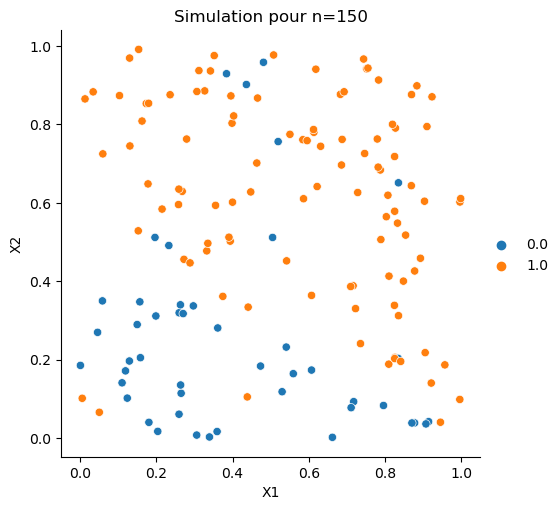

In [5]:
sns.relplot(data=df2, x='a', y="B",hue=y_train).set(
            title=f"Simulation pour n={X_train.shape[0]}", xlabel="X1", ylabel="X2")

/users/2024/ds2/122003362/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


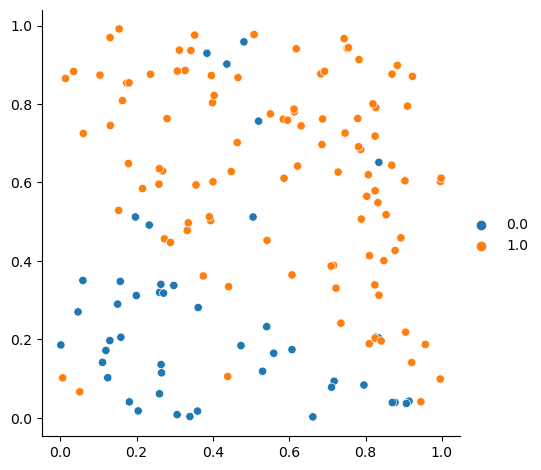

In [6]:
sns.relplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)

/users/2024/ds2/122003362/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


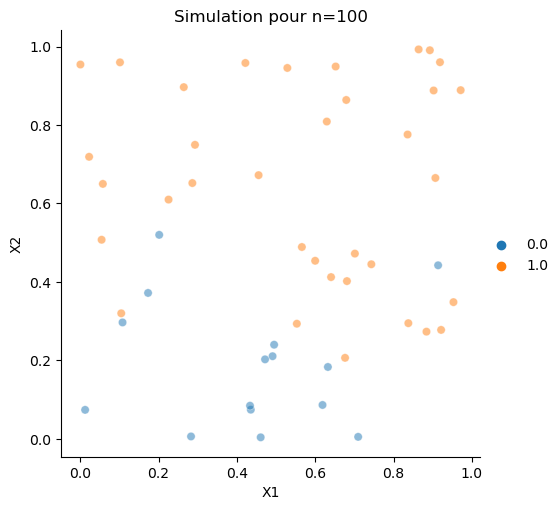

In [7]:
X_train, X_test, y_train, y_test = simu(100, .1, .9, display=True)

# Question 4

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict([[.5, .5], [.25, .75]])
print("y_pred =", y_pred)

y_pred = [1. 1.]


# Question 5, 6, 7 et 8

In [9]:
def evaluate(clf, X_train, X_test, y_train, y_test, display=False):
    # Fit model on trainset
    clf.fit(X_train, y_train)
    # Predit on testset
    y_pred = clf.predict(X_test)
    # Cumpute accuracy score
    score = accuracy_score(y_test, y_pred)
    
    if display:
        # Print score
        print(f'Name model: {clf} , Accuracy: {score}')
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Plot y_test vs y_pred
        error = y_test != y_pred
        y_pred[error] = -1
        sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred, palette="deep", ax=axes[0]).set(
            xlabel="X1", ylabel="X2")
        # Plot confusion matrix
        plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', ax=axes[1])
    
    return score

Name model: KNeighborsClassifier(n_neighbors=1) , Accuracy: 0.82


/usr/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.82

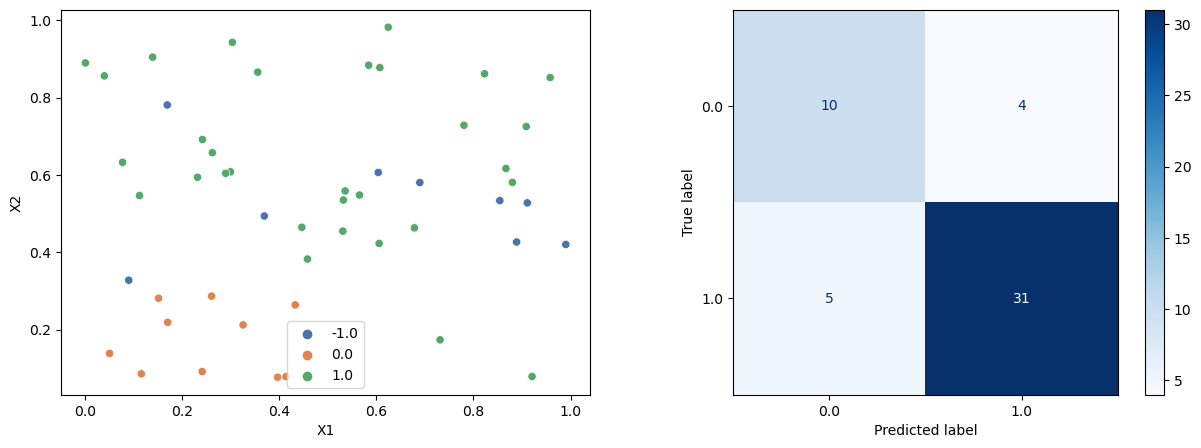

In [10]:
knn1 = KNeighborsClassifier(n_neighbors=1)
evaluate(knn1, X_train, X_test, y_train, y_test, display=True)

Name model: KNeighborsClassifier(n_neighbors=20) , Accuracy: 0.92


/usr/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.92

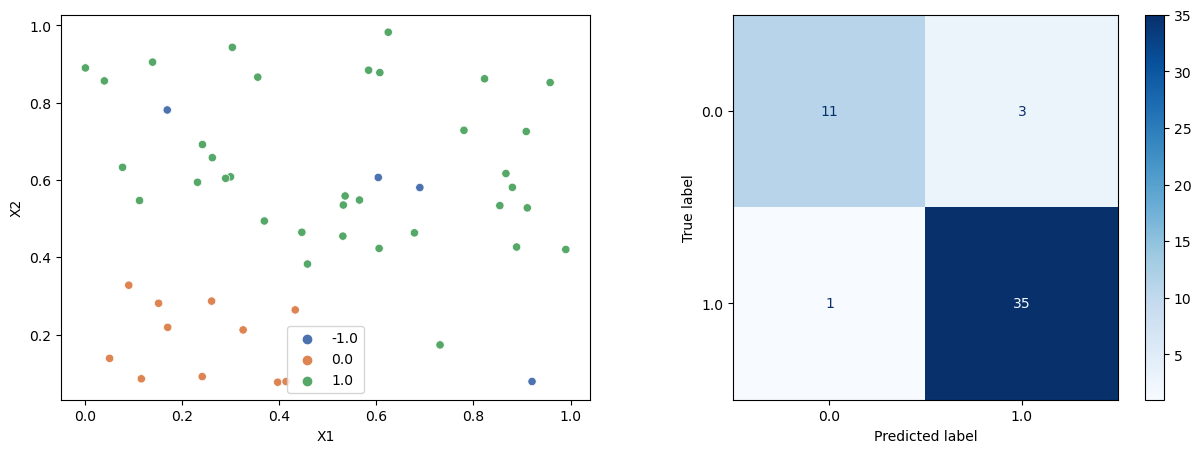

In [11]:
knn20 = KNeighborsClassifier(n_neighbors=20)
evaluate(knn20, X_train, X_test, y_train, y_test, display=True)

# Question 9

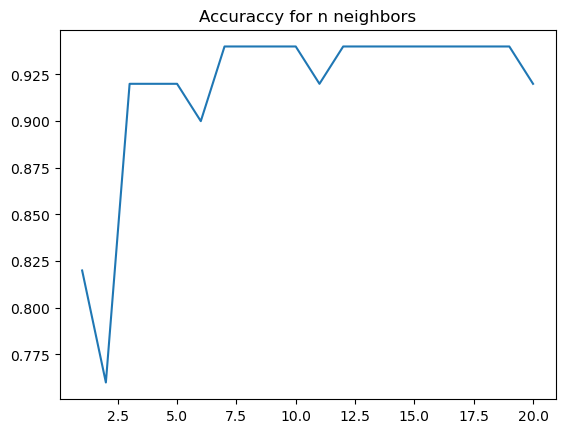

In [12]:
n = range(1, 21)
clfs = [KNeighborsClassifier(n_neighbors=k) for k in n]
scores = [evaluate(clf, X_train, X_test, y_train, y_test) for clf in clfs]
res = {n_neighbors:score for n_neighbors, score in zip(n, scores)}
sns.lineplot(x=n, y=scores).set(title="Accuraccy for n neighbors");

In [13]:
print("Best estimator:", KNeighborsClassifier(n_neighbors=max(res, key=res.get)))

Best estimator: KNeighborsClassifier(n_neighbors=7)


# Question 11

### LOO

In [14]:
loo = LeaveOneOut()
loo.get_n_splits(X_train)
scores = []
clf = KNeighborsClassifier(5)

for train_index, test_index in loo.split(X_train):
    X_train_loo, X_test_loo = X_train[train_index], X_train[test_index]
    y_train_loo, y_test_loo = y_train[train_index], y_train[test_index]
    clf.fit(X_train_loo, y_train_loo)
    y_pred = clf.predict(X_test_loo)
    scores.append(accuracy_score(y_test_loo, y_pred))
    clf = clone(clf) # Create a new unfitted estimator

In [15]:
print("Mean score:", np.mean(scores))

Mean score: 0.88


### 5-fold

In [16]:
parameters = {'n_neighbors':range(1, 21)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
print(f"Best parameters: {clf.best_params_} with mean score of {round(clf.best_score_,3)}")

Best parameters: {'n_neighbors': 11} with mean score of 0.92


# Question 12

In [17]:
final_clf = clf.best_estimator_
final_clf.fit(X_test, y_test)
y_pred = final_clf.predict(X_test)
print("Final accuracy score:", accuracy_score(y_test, y_pred))

Final accuracy score: 0.94


> Le score final est logiquement proche du score moyen de validation car les échantillon d'entrainement et de test ont été généré avec les mêmes lois.